In [25]:
### Packages
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

In [9]:
### 출력 영상 크기
plt.rcParams["figure.figsize"] = (16,9)
### 한글 표시
plt.rcParams['font.family'] = "Gulim" # 'AppleGothic' in mac

### 화소 영역 처리
● 입력 화소와 주변의 화소 값도 함께 고려하는 공간 영역 연산   
● 회선 기법(또는 컨벌루션 기법, Convolution Technique)으로 수행   
● 대상 화소와 이웃한 각 화소에 가중치를 곱한 합을 출력 화소로 생성   

### ▶ 컨볼루션(Convolution) - 합성곱
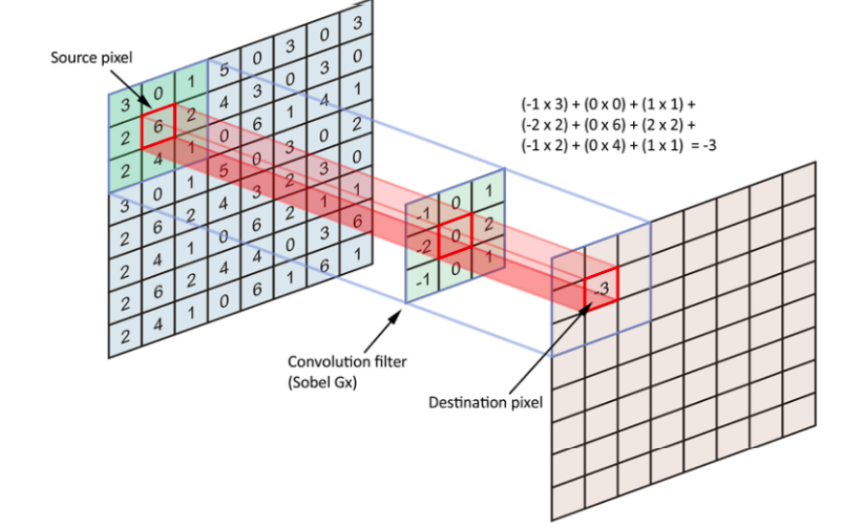

#### ●커널(kernel); 마스크(mask); 필터(filter)
■ 블러링(blurring), 샤프닝(sharpening), 엠보싱(embossing), 경계선 검출          (edge     detection) 등에 사용 되는 작은 행렬   
■ 영상처리에서 커널은 홀수 차원의 정방형 행렬(3 3, 5 5, 7 7, ...)을 사용

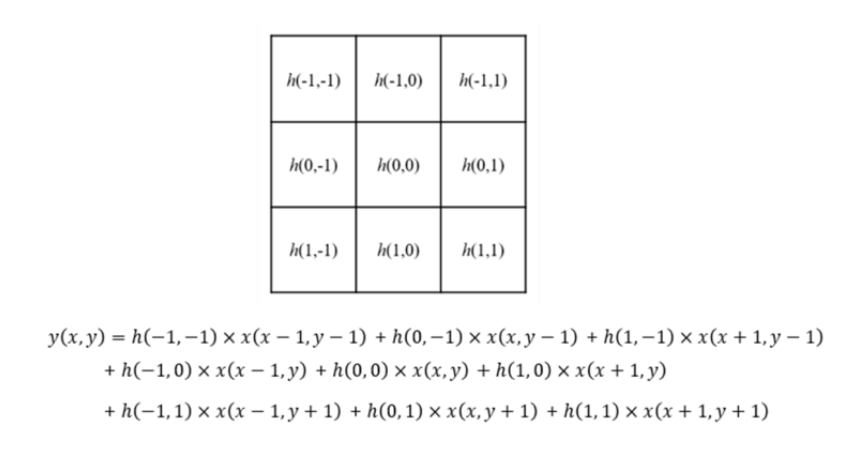

### ▶ 저주파 통과 필터
● 저주파는 통과, 고주파 성분은 저지   
● 모든 값이 양수이고 전체 합은 1   
● 잡음을 제거하거나 흐릿한 영상을 얻을 때 주로 사용   
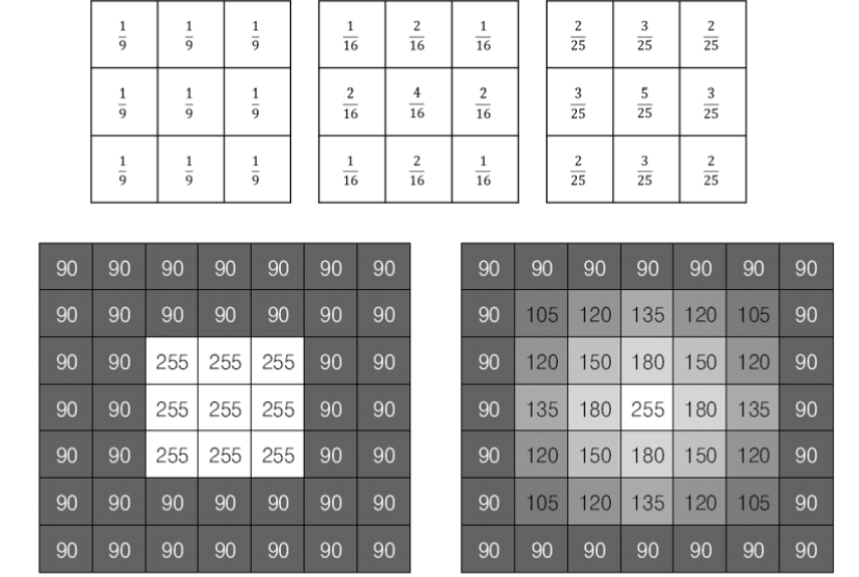

### ● Convolves an image with the kernel
■ cv2.filter2D(src, ddepth, kernel, dst=None, anchor=None, delta=None, borderType=None)   
○ src : 입력 영상   
○ ddepth : 출력 영상 데이터 타입 (-1은 입력 영상과 같음)   
○ kernel: 필터 마스크 행렬   
○ borderType: 가장자리 픽셀 확장 방식  

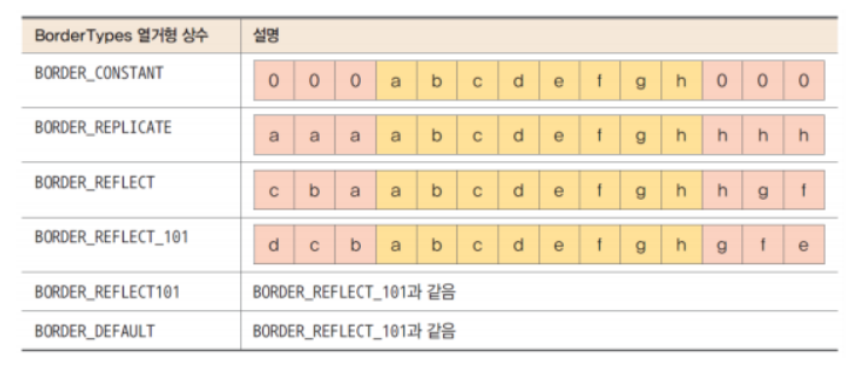

In [3]:
### 입력 영상
img_in = np.zeros((25, 25), dtype='uint8')
img_in[8:17, 8:17] = 255
img_in[12, 12] = 0

In [5]:
### 마스크
mask_1 = np.ones((3, 3)) / (3*3)
mask_2 = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]]) / 16
mask_3 = np.array([[2, 3, 2],
              [3, 5, 3],
              [2, 3, 2]]) / 25 

In [6]:
### 저주파 통과 필터
img_1 = cv2.filter2D(img_in, -1, mask_1)
img_2 = cv2.filter2D(img_in, -1, mask_2)
img_3 = cv2.filter2D(img_in, -1, mask_3)

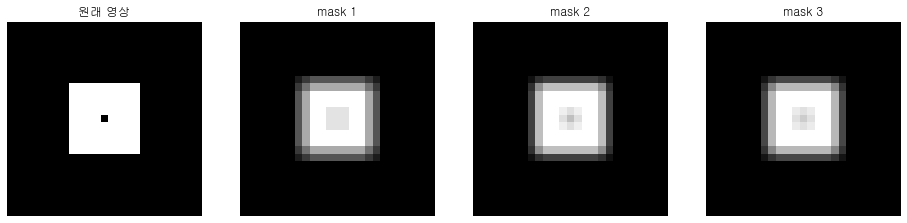

In [10]:
### 영상 출력
titles = ["원래 영상", "mask 1", "mask 2", "mask 3"]
images = [img_in, img_1, img_2, img_3]
for i in range(len(images)):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(1, 4, i+1)
    plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')
plt.show()

### ■ 저주파 통과 필터

In [11]:
### 영상 읽기
img_lena = cv2.imread(r"C:\Users\kr937\Desktop\drive\2023\Image Process\lena.png")
img_lena.shape

(512, 512, 3)

In [12]:
### 저주파 통과 필터
img_1 = cv2.filter2D(img_lena, -1, mask_1)
img_2 = cv2.filter2D(img_lena, -1, mask_2)
img_3 = cv2.filter2D(img_lena, -1, mask_3)

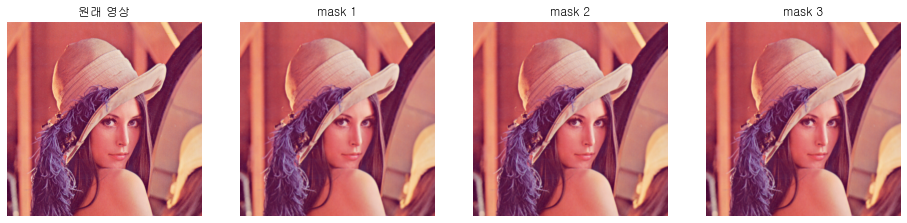

In [13]:
### 영상 출력
titles = ["원래 영상", "mask 1", "mask 2", "mask 3"]
images = [img_lena, img_1, img_2, img_3]
for i in range(len(images)):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(1, 4, i+1)
    plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')
plt.show()

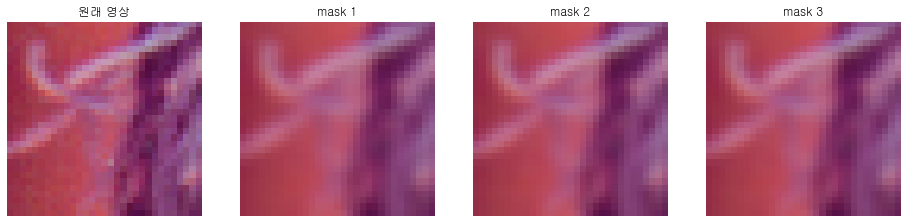

In [14]:
### 영상 출력(2)
x1, x2, y1, y2 = [300, 331, 70, 101]
titles = ["원래 영상", "mask 1", "mask 2", "mask 3"]
images = [img_lena, img_1, img_2, img_3]
for i in range(len(images)):
    img_rgb = cv2.cvtColor(images[i][x1:x2, y1:y2, :], cv2.COLOR_BGR2RGB)
    plt.subplot(1, 4, i+1)
    plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')
plt.show()

### ■ 블러링(blurring)

In [15]:
### 마스크 크기
mask_1 = np.ones((3, 3)) / (3**2)
mask_2 = np.ones((5, 5)) / (5**2)
mask_3 = np.ones((7, 7)) / (7**2)

In [19]:
### 저주파 통과 필터 - Averaging: cv2.blur()
img_1 = cv2.filter2D(img_lena, -1, mask_1)
img_2 = cv2.filter2D(img_lena, -1, mask_2)
img_3 = cv2.filter2D(img_lena, -1, mask_3)

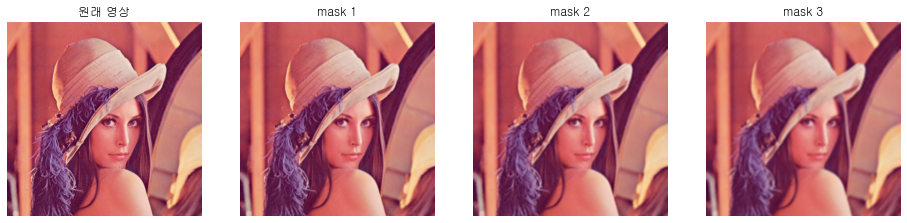

In [20]:
### 영상 출력
titles = ["원래 영상", "mask 1", "mask 2", "mask 3"]
images = [img_lena, img_1, img_2, img_3]
for i in range(len(images)):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(1, 4, i+1)
    plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')
plt.show()

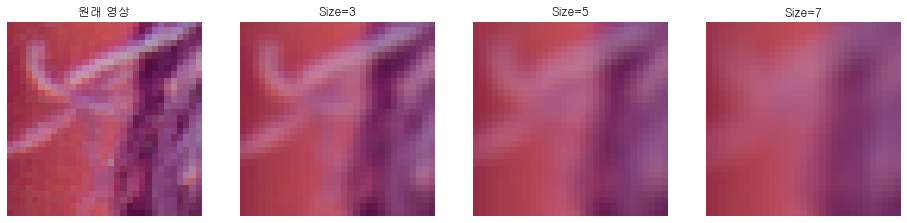

In [22]:
### 영상 출력(3)
x1, x2, y1, y2 = [300, 331, 70, 101]
titles = ["원래 영상", "Size=3", "Size=5", "Size=7"]
images = [img_lena, img_1, img_2, img_3]
for i in range(len(images)):
    img_rgb = cv2.cvtColor(images[i][x1:x2, y1:y2, :], cv2.COLOR_BGR2RGB)
    plt.subplot(1, 4, i+1)
    plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')
plt.show()

### ■ 가우시안 필터(Gaussian filter)
● 가우시안 커널의 모양   
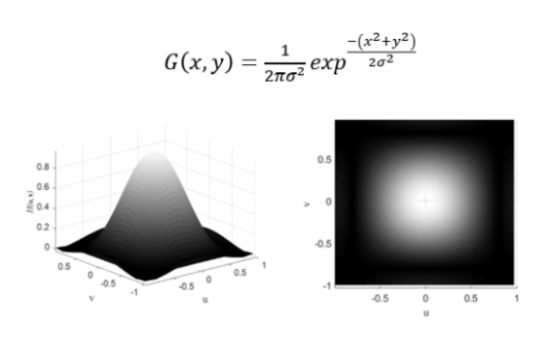   
● 가우시안 커널의 크기   
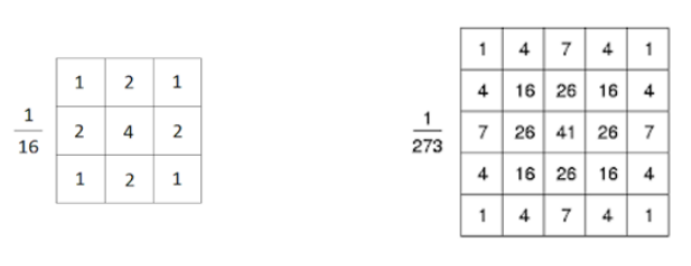

■ cv2.GaussianBlur(src, ksize, sigmaX, sigmaY, borderType)
○ src: 입력 영상   
○ ksize: 가우스 커널 크기   
○ sigmaX: X 방향의 가우스 커널 표준 편차   
○ sigmaY: Y 방향의 가우스 커널 표준 편차(두 표준편차가 0이면 각가 ksize.width 및 ksize.height에서 계산)   
○ borderType: 가장자리 픽셀 확장 방식   

In [23]:
### 영상 읽기
img_lena = cv2.imread(r"C:\Users\kr937\Desktop\drive\2023\Image Process\lena.png")
img_lena.shape

(512, 512, 3)

In [26]:
### 가우시안 필터(Gaussian filter)
img_1 = cv2.GaussianBlur(img_lena, (3, 3), 0)
img_2 = cv2.GaussianBlur(img_lena, (5, 5), 0)
img_3 = cv2.GaussianBlur(img_lena, (7, 7), 0)

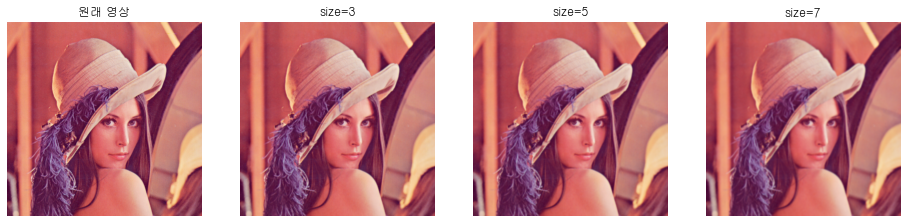

In [27]:
### 영상 출력
titles = ["원래 영상", "size=3", "size=5", "size=7"]
images = [img_lena, img_1, img_2, img_3]
for i in range(len(images)):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(1, 4, i+1)
    plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')
plt.show()

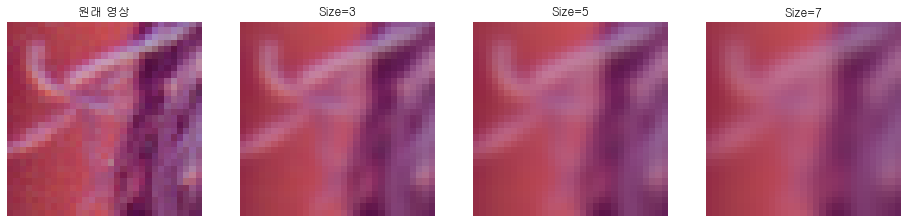

In [28]:
### 영상 출력(3)
x1, x2, y1, y2 = [300, 331, 70, 101]
titles = ["원래 영상", "Size=3", "Size=5", "Size=7"]
images = [img_lena, img_1, img_2, img_3]
for i in range(len(images)):
    img_rgb = cv2.cvtColor(images[i][x1:x2, y1:y2, :], cv2.COLOR_BGR2RGB)
    plt.subplot(1, 4, i+1)
    plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')
plt.show()

### ▶ 고주파 통과 필터
● 블러(blur)와 반대되는 효과   
● 고주파에 해당하는 상세한 부분을 강조 → 대비 효과 증가   
● 선명한 영상을 생성

### ■ 샤프닝(Sharpening)
● 샤프닝 커널   
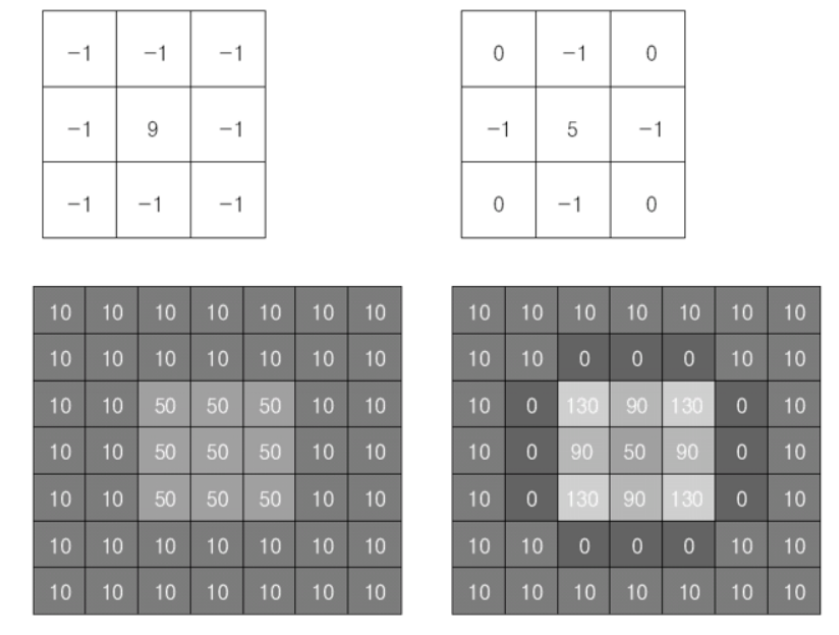

In [29]:
### 영상 읽기
img_lena = cv2.imread(r"C:\Users\kr937\Desktop\drive\2023\Image Process\lena.png")
img_lena.shape

(512, 512, 3)

In [30]:
### 샤프닝 커널
mask_1 = np.array([[-1, -1, -1],
                   [-1, 9, -1],
                   [-1, -1, -1]])
mask_2 = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

In [31]:
### 샤프닝 필터
img_1 = cv2.filter2D(img_lena, -1, mask_1)
img_2 = cv2.filter2D(img_lena, -1, mask_2)

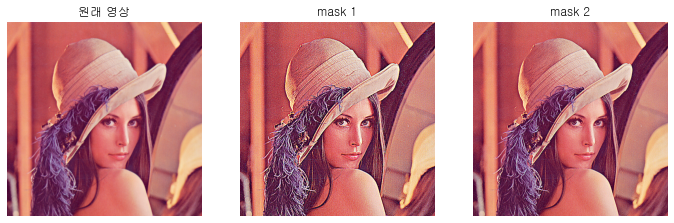

In [32]:
### 영상 출력
titles = ["원래 영상", "mask 1", "mask 2"]
images = [img_lena, img_1, img_2]
for i in range(len(images)):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(1, 4, i+1)
    plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')
plt.show()

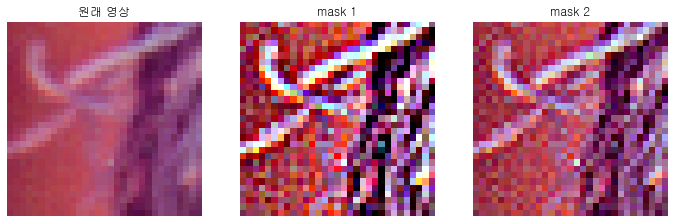

In [33]:
### 영상 출력(2)
x1, x2, y1, y2 = [300, 331, 70, 101]
titles = ["원래 영상", "mask 1", "mask 2"]
images = [img_lena, img_1, img_2]
for i in range(len(images)):
    img_rgb = cv2.cvtColor(images[i][x1:x2, y1:y2, :], cv2.COLOR_BGR2RGB)
    plt.subplot(1, 4, i+1)
    plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')
plt.show()

### ■ 엠보싱(Embossing)
● 구분된 경계선이 볼록한 효과로 나타남   
● 가운데에 있는 계수가 다른 계수를 상괘시키도록 구성해서 경계선을 검출   
● 마스크에는 음의 계수 값 -1이 있으므로 생성된 영상의 화소 값은 음수 → +128   
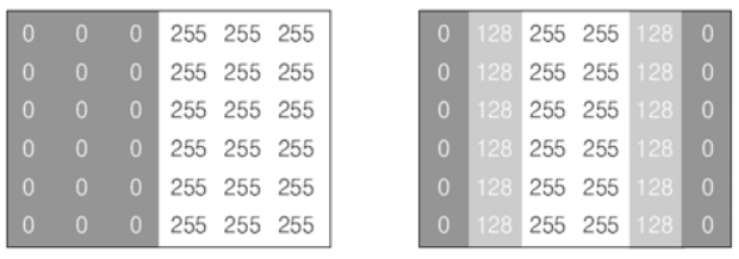

In [39]:
### 영상 읽기
img_raw = cv2.imread(r"C:\Users\kr937\Desktop\drive\2023\Image Process\f1.png")
img_raw.shape

(204, 203, 3)

In [40]:
### 엠보싱 커널
mask = np.array([[-1, -1, 0],
                 [-1, 0, 1],
                 [0, 1, 1]])
mask = np.array([[-1, 0, 0],
                 [0, 0, 0],
                 [0, 0, 1]])

In [41]:
### BGR → YCrCb 변환
img_raw_ycc = cv2.cvtColor(img_raw, cv2.COLOR_BGR2YCrCb)

In [42]:
### 엠보싱 필터
img_1 = cv2.filter2D(img_raw, -1, mask, delta=128)
img_2 = cv2.filter2D(img_raw_ycc[:,:,0], -1, mask, delta=128)

In [43]:
### YCrCb → BGR 변환
img_raw_ycc[:,:,0] = img_2
img_3 = cv2.cvtColor(img_raw_ycc, cv2.COLOR_YCrCb2BGR)

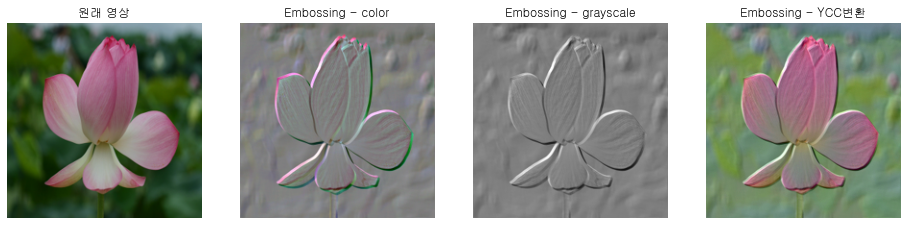

In [45]:
### 영상 출력
titles = ["원래 영상", "Embossing - color",
          "Embossing - grayscale", "Embossing - YCC변환"]
images = [img_raw, img_1, img_2, img_3]
for i in range(len(images)):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(1, 4, i+1), plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')
plt.show()